<a href="https://colab.research.google.com/github/DannaArciniega22/Actividad-3-Valores-Atipicos-/blob/main/Actividad_3_2_(Valores_At%C3%ADpicos_por_DataFrame)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ACTIVIDAD 3.1 | VALORES ATÍPICOS POR DATAFRAME
*   Danna Paola Arciniega Zúñiga | A01731987

In [2]:
#IMPORTAR LIBRERIAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#CARGAR ARCHIVOS
from google.colab import files
files.upload()

## AÑO 2020

In [68]:
#CARGA DESDE UN ARCHIVO CON VARIAS PAGUINAS
df_2020 = pd.read_excel('Gastos y costos 20-23.xlsx',sheet_name='2020',skiprows=5)
df_2020.head()

,FECHA,FOLIO,UUID,RFC,PROVEEDOR,TIPO GASTO,GASTO,DESCRIPCION,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,TIPO,STATUS,POLIZA,Columna1
0,2020-01-01,39408,BD20F436-72CC-4BE2-AD37-5999D71AA391,ARE080115PBA,ARSI RENTA SA DE CV,MAQUINARIA,NaN,"Descripción: REVOLVEDORA, Modelo: ULTRAMP9A, M...",1.0,0.00,2248.28,0.0,0.0,2248.28,16300.00,I,Vigente,NaN,14051.72
1,2020-01-01,0001010100750847116902,85AEAC2E-6395-44A0-9CB9-754D06893375,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,NaN,COMISION COBRADA,1.0,490.00,78.40,0.0,0.0,568.40,568.40,I,Vigente,NaN,0.00
2,2020-01-01,0001010100752163714102,BD0DFE85-D776-41CB-9C5C-4FA7923E687A,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,NaN,COMISION COBRADA,1.0,195.00,31.20,0.0,0.0,226.20,226.20,I,Vigente,NaN,0.00
3,2020-01-01,3663,EF4504D6-830D-415C-AF03-80CF54C5E28E,PSS120625C86,PROMOTORA DE SERVICIOS Y SOLUCIONES EMPRESARIA...,HONORARIOS CONTABLES,NaN,HONORARIOS CONTABLES\nDEL MES DE ENERO DEL 2020.,1.0,10694.25,1711.08,0.0,0.0,12405.33,12405.33,I,Vigente,NaN,0.00
4,2020-01-01,2849,EC2F4AA4-BA64-4E2E-A5B7-4EBBE042D6D3,ENA7006081P0,ELECTROTERMICA NACIONAL SA DE CV,COMPRAS,NaN,Pago,1.0,0.00,NaN,0.0,0.0,0.00,0.00,P,Vigente,NaN,0.00


In [69]:
#OBTENER INFORMACION DEL DATA FRAME
# 11 columnas cualitativas
# 8 columnas cantitativas
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3342 entries, 0 to 3341
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        3342 non-null   datetime64[ns]
 1   FOLIO        3153 non-null   object        
 2   UUID         3342 non-null   object        
 3   RFC          3342 non-null   object        
 4   PROVEEDOR    3342 non-null   object        
 5   TIPO GASTO   3342 non-null   object        
 6   GASTO        840 non-null    object        
 7   DESCRIPCION  3342 non-null   object        
 8   TC           2951 non-null   float64       
 9   IMPORTE      3308 non-null   float64       
 10  IVA          3074 non-null   float64       
 11  RET ISR      3342 non-null   float64       
 12  RET IVA      3342 non-null   float64       
 13  TOTAL MX     3342 non-null   float64       
 14  TOTAL SAT    3342 non-null   float64       
 15  TIPO         3341 non-null   object        
 16  STATUS

In [70]:
#FILTRO POR COLUMNAS
cuantitativas_2020=df_2020.iloc[:,[8,9,10,11,12,13,14,18]]
cualititativas_2020=df_2020.iloc[:,[0,1,2,3,4,5,6,7,15,16,17]]

In [71]:
#IDENTIFICAR VALORES NULOS
valores_nulos_2020_cuantitativas=cuantitativas_2020.isnull().sum()
valores_nulos_2020_cualititativas=cualititativas_2020.isnull().sum()
print("Valores Nulos | Columnas Cuantitativas")
print(valores_nulos_2020_cuantitativas)
print('\n')
print("Valores Nulos | Columnas Cualitativas")
print(valores_nulos_2020_cualititativas)

Valores Nulos | Columnas Cuantitativas
TC           391
IMPORTE       34
IVA          268
RET ISR        0
RET IVA        0
TOTAL MX       0
TOTAL SAT      0
Columna1       0
dtype: int64


Valores Nulos | Columnas Cualitativas
FECHA             0
FOLIO           189
UUID              0
RFC               0
PROVEEDOR         0
TIPO GASTO        0
GASTO          2502
DESCRIPCION       0
TIPO              1
STATUS            0
POLIZA         3321
dtype: int64


In [ ]:
#REMPLAZAR LOS DATOS NULOS EN AMBOS DF
cuantitativas_2020=cuantitativas_2020.fillna(method="bfill")

cualititativas_2020["POLIZA"]=cualititativas_2020["POLIZA"].fillna("XX00-XXXXX")
cualititativas_2020[["FOLIO", "TIPO","GASTO"]]=cualititativas_2020[["FOLIO", "TIPO","GASTO"]].fillna(method="bfill")

In [73]:
#VALIDAD VALORES NULOS
valores_nulos_2020_cuantitativas=cuantitativas_2020.isnull().sum()
valores_nulos_2020_cualititativas=cualititativas_2020.isnull().sum()
print("Valores Nulos | Columnas Cuantitativas")
print(valores_nulos_2020_cuantitativas)
print('\n')
print("Valores Nulos | Columnas Cualitativas")
print(valores_nulos_2020_cualititativas)

Valores Nulos | Columnas Cuantitativas
TC           0
IMPORTE      0
IVA          0
RET ISR      0
RET IVA      0
TOTAL MX     0
TOTAL SAT    0
Columna1     0
dtype: int64


Valores Nulos | Columnas Cualitativas
FECHA          0
FOLIO          0
UUID           0
RFC            0
PROVEEDOR      0
TIPO GASTO     0
GASTO          0
DESCRIPCION    0
TIPO           0
STATUS         0
POLIZA         0
dtype: int64


<Figure size 500x300 with 0 Axes>

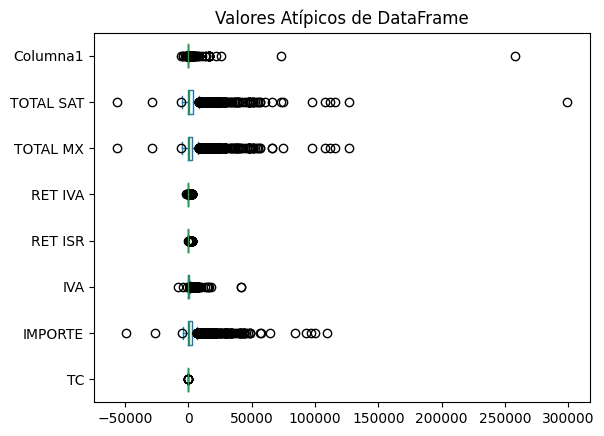

In [74]:
#REALIZAMOS DIAGRAMA DE CAJA O BIGOTE DE CADA COLUMNA DEL DATAFRAME
fig = plt.figure(figsize=(5,3))
cuantitativas_2020.plot(kind='box',vert=False)
plt.title('Valores Atípicos de DataFrame')
plt.show()

In [75]:
#METODO APLICANDO DESVIACION ESTANDAR | ENCUENTRO LOS VALORES EXTREMOS
y=cuantitativas_2020
Limite_Superior_2020=y.mean()+3*y.std()
Limite_Inferior_2020=y.mean()-3*y.std()

#ENCONTRAR OUTLIERS
outliers_2020=cuantitativas_2020[(y>Limite_Superior_2020)|(y<Limite_Inferior_2020)]
#NOTA: los que estan con NaN son insiders

#OBTENER LOS DATOS Y LOS OUTLIERS SE CONVIERTEN EN NULOS EN EL DATAFRAME
cuantitativas_2020_1=cuantitativas_2020[(y<=Limite_Superior_2020)&(y>=Limite_Inferior_2020)]

#REMPLAZAMOS VALORES ATIPICOS (NULOS)DEL DATAFRAME CON MEAN
data_clean_2020=cuantitativas_2020_1.copy()
data_clean_2020=data_clean_2020.fillna(round(cuantitativas_2020.mean(),1))

In [76]:
#IDENTIFICAR VALORES NULOS
valores_nulos=data_clean_2020.isnull().sum()
valores_nulos

TC           0
IMPORTE      0
IVA          0
RET ISR      0
RET IVA      0
TOTAL MX     0
TOTAL SAT    0
Columna1     0
dtype: int64

In [77]:
#JUNTAR
Datos_limpios_2020=pd.concat([cualititativas_2020,data_clean_2020],axis=1)
Datos_limpios_2020.head()

,FECHA,FOLIO,UUID,RFC,PROVEEDOR,TIPO GASTO,GASTO,DESCRIPCION,TIPO,STATUS,POLIZA,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,Columna1
0,2020-01-01,39408,BD20F436-72CC-4BE2-AD37-5999D71AA391,ARE080115PBA,ARSI RENTA SA DE CV,MAQUINARIA,COMPRA,"Descripción: REVOLVEDORA, Modelo: ULTRAMP9A, M...",I,Vigente,XX00-XXXXX,1.0,0.00,2248.28,0.0,0.0,2248.28,16300.00,14051.72
1,2020-01-01,0001010100750847116902,85AEAC2E-6395-44A0-9CB9-754D06893375,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMPRA,COMISION COBRADA,I,Vigente,XX00-XXXXX,1.0,490.00,78.40,0.0,0.0,568.40,568.40,0.00
2,2020-01-01,0001010100752163714102,BD0DFE85-D776-41CB-9C5C-4FA7923E687A,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMPRA,COMISION COBRADA,I,Vigente,XX00-XXXXX,1.0,195.00,31.20,0.0,0.0,226.20,226.20,0.00
3,2020-01-01,3663,EF4504D6-830D-415C-AF03-80CF54C5E28E,PSS120625C86,PROMOTORA DE SERVICIOS Y SOLUCIONES EMPRESARIA...,HONORARIOS CONTABLES,COMPRA,HONORARIOS CONTABLES\nDEL MES DE ENERO DEL 2020.,I,Vigente,XX00-XXXXX,1.0,10694.25,1711.08,0.0,0.0,12405.33,12405.33,0.00
4,2020-01-01,2849,EC2F4AA4-BA64-4E2E-A5B7-4EBBE042D6D3,ENA7006081P0,ELECTROTERMICA NACIONAL SA DE CV,COMPRAS,COMPRA,Pago,P,Vigente,XX00-XXXXX,1.0,0.00,5131.03,0.0,0.0,0.00,0.00,0.00


In [ ]:
#CONVERTIR DATAFRAME A CSV
Datos_limpios_2020.to_csv("Datos_limpios_2020.csv")

#DESCARGAR ARCHIVOS FILTRADO A CSV
from google.colab import files

files.download("Datos_limpios_2020.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## AÑO 2021

In [56]:
#CARGA DESDE UN ARCHIVO CON VARIAS PAGUINAS
df_2021 = pd.read_excel('Gastos y costos 20-23.xlsx',sheet_name='2021',skiprows=3)
df_2021.head()

,FECHA,FOLIO,UUID,RFC,PROVEEDOR,TIPO GASTO,DESCRIPCION,MP,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,TIPO,STATUS,POLIZA
0,2021-01-01,0001010100750847116902,71B4C8B9-8DAA-47CC-AD47-9DD90AA5AF6B,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMISION COBRADA,PUE,1.0,490.00,78.40,0.0,0.0,568.4,568.4,I,Vigente,0
1,2021-01-01,0001010100752163714102,B8AEDE83-CC76-404C-A611-6B5A87BA561F,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMISION COBRADA,PUE,1.0,345.00,55.20,0.0,0.0,400.2,400.2,I,Vigente,0
2,2021-01-01,19788,19B9B2C2-DF58-E24D-B43A-3FC4D5A929E7,ESI9612311E7,"ELECTRONICOS Y SIMILARES, S.A. DE C.V.",COMPRAS,MOTO E7 PLUS AZUL 64GB 4RAM,PUE,1.0,3447.41,551.59,0.0,0.0,3999.0,3999.0,I,Vigente,0
3,2021-01-01,211781,EAB26414-DD9A-4E8F-9F5C-05FE24D98E48,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 6/36 de 03/12/2...,PPD,1.0,5551.38,888.22,0.0,0.0,6439.6,6439.6,I,Vigente,0
4,2021-01-01,211782,C16F79B5-FB35-4BFC-AF84-708B24F500BB,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 6/36 de 03/12/2...,PPD,1.0,5551.98,888.32,0.0,0.0,6440.3,6440.3,I,Vigente,0


In [57]:
#OBTENER INFORMACION DEL DATA FRAME
# 11 columnas cualitativas
# 7 columnas cantitativas
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3035 entries, 0 to 3034
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        3035 non-null   datetime64[ns]
 1   FOLIO        2888 non-null   object        
 2   UUID         3035 non-null   object        
 3   RFC          3035 non-null   object        
 4   PROVEEDOR    3035 non-null   object        
 5   TIPO GASTO   3035 non-null   object        
 6   DESCRIPCION  3035 non-null   object        
 7   MP           2381 non-null   object        
 8   TC           3035 non-null   float64       
 9   IMPORTE      3035 non-null   float64       
 10  IVA          3035 non-null   float64       
 11  RET ISR      3035 non-null   float64       
 12  RET IVA      3035 non-null   float64       
 13  TOTAL MX     3035 non-null   float64       
 14  TOTAL SAT    3035 non-null   float64       
 15  TIPO         3035 non-null   object        
 16  STATUS

In [58]:
#FILTRO POR COLUMNAS
cuantitativas_2021=df_2021.iloc[:,[8,9,10,11,12,13,14]]
cualititativas_2021=df_2021.iloc[:,[0,1,2,3,4,5,6,7,15,16,17]]

In [59]:
#IDENTIFICAR VALORES NULOS
valores_nulos_2021_cuantitativas=cuantitativas_2021.isnull().sum()
valores_nulos_2021_cualititativas=cualititativas_2021.isnull().sum()
print("Valores Nulos | Columnas Cuantitativas")
print(valores_nulos_2021_cuantitativas)
print('\n')
print("Valores Nulos | Columnas Cualitativas")
print(valores_nulos_2021_cualititativas)

Valores Nulos | Columnas Cuantitativas
TC           0
IMPORTE      0
IVA          0
RET ISR      0
RET IVA      0
TOTAL MX     0
TOTAL SAT    0
dtype: int64


Valores Nulos | Columnas Cualitativas
FECHA             0
FOLIO           147
UUID              0
RFC               0
PROVEEDOR         0
TIPO GASTO        0
DESCRIPCION       0
MP              654
TIPO              0
STATUS            0
POLIZA         2372
dtype: int64


In [ ]:
#REMPLAZAR LOS DATOS NULOS EN AMBOS DF
cualititativas_2021["POLIZA"]=cualititativas_2021["POLIZA"].fillna("XX00-XXXXX")
cualititativas_2021[["FOLIO", "MP"]]=cualititativas_2021[["FOLIO", "MP"]].fillna(method="bfill")

In [61]:
#VALIDAD VALORES NULOS
valores_nulos_2021_cuantitativas=cuantitativas_2021.isnull().sum()
valores_nulos_2021_cualititativas=cualititativas_2021.isnull().sum()
print("Valores Nulos | Columnas Cuantitativas")
print(valores_nulos_2021_cuantitativas)
print('\n')
print("Valores Nulos | Columnas Cualitativas")
print(valores_nulos_2021_cualititativas)

Valores Nulos | Columnas Cuantitativas
TC           0
IMPORTE      0
IVA          0
RET ISR      0
RET IVA      0
TOTAL MX     0
TOTAL SAT    0
dtype: int64


Valores Nulos | Columnas Cualitativas
FECHA          0
FOLIO          0
UUID           0
RFC            0
PROVEEDOR      0
TIPO GASTO     0
DESCRIPCION    0
MP             0
TIPO           0
STATUS         0
POLIZA         0
dtype: int64


<Figure size 500x300 with 0 Axes>

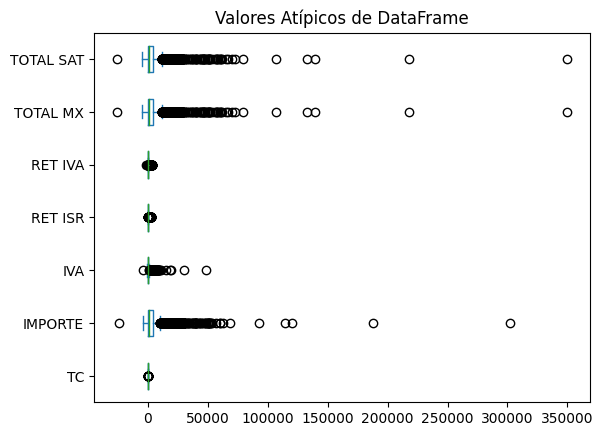

In [62]:
#REALIZAMOS DIAGRAMA DE CAJA O BIGOTE DE CADA COLUMNA DEL DATAFRAME
fig = plt.figure(figsize=(5,3))
cuantitativas_2021.plot(kind='box',vert=False)
plt.title('Valores Atípicos de DataFrame')
plt.show()

In [63]:
#METODO APLICANDO CUARTILES | ENCUENTRO CUARTILES 0.25 Y 0.75
y=cuantitativas_2021

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr=percentile75 - percentile25

Limite_Superior_iqr_2021 =percentile75 + 1.5*iqr
Limite_Inferior_iqr_2021 =percentile25 - 1.5*iqr

#ENCONTRAR OUTLIERS
outliers_iqr_2021 =cuantitativas_2021[(y>Limite_Superior_iqr_2021)|(y<Limite_Inferior_iqr_2021)]
outliers_iqr_2021.head()

#OBTENER DATOS LIMPIOS
año2021_iqr=cuantitativas_2021[(y<=Limite_Superior_iqr_2021)&(y>=Limite_Inferior_iqr_2021)]
año2021_iqr.head()

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,1.0,490.00,78.40,0.0,0.0,568.4,568.4
1,1.0,345.00,55.20,0.0,0.0,400.2,400.2
2,1.0,3447.41,551.59,0.0,0.0,3999.0,3999.0
3,1.0,5551.38,888.22,0.0,0.0,6439.6,6439.6
4,1.0,5551.98,888.32,0.0,0.0,6440.3,6440.3


In [64]:
#IDENTIFICAR VALORES NULOS
valores_nulos_2021_1=año2021_iqr.isnull().sum()
valores_nulos_2021_1

TC            24
IMPORTE      336
IVA          342
RET ISR       56
RET IVA      212
TOTAL MX     347
TOTAL SAT    351
dtype: int64

In [65]:
#REMPLAZAMOS VALORES ATIPICOS (NULOS)DEL DATAFRAME CON MEAN
año2021_1_iqr=año2021_iqr.copy()
año2021_1_iqr=año2021_iqr.fillna(round(año2021_iqr.mean(),1))
año2021_1_iqr.head()

,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,1.0,490.00,78.40,0.0,0.0,568.4,568.4
1,1.0,345.00,55.20,0.0,0.0,400.2,400.2
2,1.0,3447.41,551.59,0.0,0.0,3999.0,3999.0
3,1.0,5551.38,888.22,0.0,0.0,6439.6,6439.6
4,1.0,5551.98,888.32,0.0,0.0,6440.3,6440.3


In [66]:
#JUNTAR
Datos_limpios_2021=pd.concat([cualititativas_2021,año2021_1_iqr],axis=1)
Datos_limpios_2021.head()

,FECHA,FOLIO,UUID,RFC,PROVEEDOR,TIPO GASTO,DESCRIPCION,MP,TIPO,STATUS,POLIZA,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,2021-01-01,0001010100750847116902,71B4C8B9-8DAA-47CC-AD47-9DD90AA5AF6B,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMISION COBRADA,PUE,I,Vigente,0,1.0,490.00,78.40,0.0,0.0,568.4,568.4
1,2021-01-01,0001010100752163714102,B8AEDE83-CC76-404C-A611-6B5A87BA561F,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,COMISION COBRADA,PUE,I,Vigente,0,1.0,345.00,55.20,0.0,0.0,400.2,400.2
2,2021-01-01,19788,19B9B2C2-DF58-E24D-B43A-3FC4D5A929E7,ESI9612311E7,"ELECTRONICOS Y SIMILARES, S.A. DE C.V.",COMPRAS,MOTO E7 PLUS AZUL 64GB 4RAM,PUE,I,Vigente,0,1.0,3447.41,551.59,0.0,0.0,3999.0,3999.0
3,2021-01-01,211781,EAB26414-DD9A-4E8F-9F5C-05FE24D98E48,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 6/36 de 03/12/2...,PPD,I,Vigente,0,1.0,5551.38,888.22,0.0,0.0,6439.6,6439.6
4,2021-01-01,211782,C16F79B5-FB35-4BFC-AF84-708B24F500BB,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 6/36 de 03/12/2...,PPD,I,Vigente,0,1.0,5551.98,888.32,0.0,0.0,6440.3,6440.3


In [ ]:
#CONVERTIR DATAFRAME A CSV
Datos_limpios_2021.to_csv("Datos_limpios_2021.csv")

#DESCARGAR ARCHIVOS FILTRADO A CSV
from google.colab import files

files.download("Datos_limpios_2021.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## AÑO 2022

In [45]:
#CARGA DESDE UN ARCHIVO CON VARIAS PAGUINAS
df_2022 = pd.read_excel('Gastos y costos 20-23.xlsx',sheet_name='2022',skiprows=3)
df_2022.head()

,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,TOTAL SAT,Tipo,Status,Poliza
0,2022-01-01,280108,9DA0E63F-1D47-441F-93D7-C2E05AE4D35E,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 18/36 de 03/12/...,PPD,1.0,5551.38,888.22,0.0,0.0,NaN,6439.6,6439.6,I,Vigente,PE02-ENE22
1,2022-01-01,280109,7E00E776-A839-4D57-B291-411109164B2F,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 18/36 de 03/12/...,PPD,1.0,5551.98,888.32,0.0,0.0,NaN,6440.3,6440.3,I,Vigente,PE03-ENE22
2,2022-01-01,007817297284,BB6585C1-3B54-4130-AFD0-1867C3764821,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,Servicios de Facturación,PUE,1.0,0.00,0.00,0.0,0.0,NaN,0.0,0.0,I,Vigente,NaN
3,2022-01-01,5595,B5E4B4EB-6C2F-11EC-BB9D-00155D014009,ZEGC530520V4A,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,COMPRAS,Pago,NaN,1.0,0.00,0.00,0.0,0.0,NaN,0.0,0.0,P,Vigente,NaN
4,2022-01-01,5614,BB6756D1-6CCD-11EC-947D-00155D014407,ZEGC530520V4A,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,COMPRAS,Pago,NaN,1.0,0.00,0.00,0.0,0.0,NaN,0.0,0.0,P,Vigente,NaN


In [46]:
#OBTENER INFORMACION DEL DATA FRAME
# 11 columnas cualitativas
# 8 columnas cantitativas
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2577 entries, 0 to 2576
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Fecha        2577 non-null   datetime64[ns]
 1   Folio        2475 non-null   object        
 2   UUID         2577 non-null   object        
 3   RFC          2577 non-null   object        
 4   Proveedor    2577 non-null   object        
 5   TIPO GASTO   2577 non-null   object        
 6   Descripción  2577 non-null   object        
 7   MP           2024 non-null   object        
 8   TC           1941 non-null   float64       
 9   Importe      2577 non-null   float64       
 10  IVA          2577 non-null   float64       
 11  RET ISR      2577 non-null   float64       
 12  RET IVA      2577 non-null   float64       
 13  Otros        0 non-null      float64       
 14  TOTAL MX     2577 non-null   float64       
 15  TOTAL SAT    2577 non-null   float64       
 16  Tipo  

In [47]:
#FILTRO POR COLUMNAS
cuantitativas_2022=df_2022.iloc[:,[8,9,10,11,12,13,14,15]]
cualititativas_2022=df_2022.iloc[:,[0,1,2,3,4,5,6,7,16,17,18]]

In [48]:
#IDENTIFICAR VALORES NULOS
valores_nulos_2022_cuantitativas=cuantitativas_2022.isnull().sum()
valores_nulos_2022_cualititativas=cualititativas_2022.isnull().sum()
print("Valores Nulos | Columnas Cuantitativas")
print(valores_nulos_2022_cuantitativas)
print('\n')
print("Valores Nulos | Columnas Cualitativas")
print(valores_nulos_2022_cualititativas)

Valores Nulos | Columnas Cuantitativas
TC            636
Importe         0
IVA             0
RET ISR         0
RET IVA         0
Otros        2577
TOTAL MX        0
TOTAL SAT       0
dtype: int64


Valores Nulos | Columnas Cualitativas
Fecha            0
Folio          102
UUID             0
RFC              0
Proveedor        0
TIPO GASTO       0
Descripción      0
MP             553
Tipo             0
Status           0
Poliza         801
dtype: int64


In [ ]:
#REMPLAZAR LOS DATOS NULOS EN AMBOS DF
cuantitativas_2022=cuantitativas_2022.fillna(method="ffill")
cuantitativas_2022["Otros"]=cuantitativas_2022["Otros"].fillna(0)

cualititativas_2022["Poliza"]=cualititativas_2022["Poliza"].fillna("XX00-XXXXX")
cualititativas_2022[["Folio", "MP"]]=cualititativas_2022[["Folio", "MP"]].fillna(method="ffill")

In [50]:
#VALIDAD VALORES NULOS
valores_nulos_2022_cuantitativas=cuantitativas_2022.isnull().sum()
valores_nulos_2022_cualititativas=cualititativas_2022.isnull().sum()
print("Valores Nulos | Columnas Cuantitativas")
print(valores_nulos_2022_cuantitativas)
print('\n')
print("Valores Nulos | Columnas Cualitativas")
print(valores_nulos_2022_cualititativas)

Valores Nulos | Columnas Cuantitativas
TC           0
Importe      0
IVA          0
RET ISR      0
RET IVA      0
Otros        0
TOTAL MX     0
TOTAL SAT    0
dtype: int64


Valores Nulos | Columnas Cualitativas
Fecha          0
Folio          0
UUID           0
RFC            0
Proveedor      0
TIPO GASTO     0
Descripción    0
MP             0
Tipo           0
Status         0
Poliza         0
dtype: int64


<Figure size 500x300 with 0 Axes>

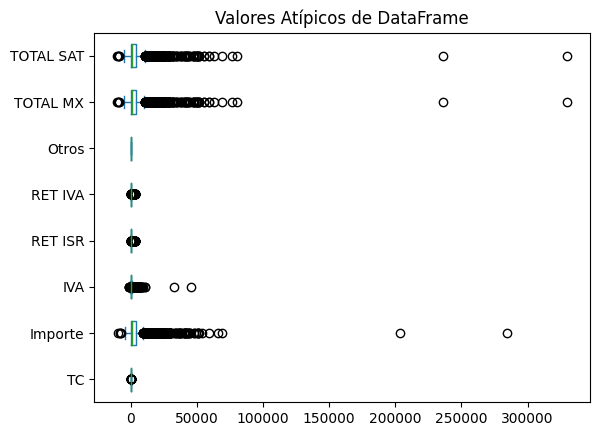

In [51]:
#REALIZAMOS DIAGRAMA DE CAJA O BIGOTE DE CADA COLUMNA DEL DATAFRAME
fig = plt.figure(figsize=(5,3))
cuantitativas_2022.plot(kind='box',vert=False)
plt.title('Valores Atípicos de DataFrame')
plt.show()

In [52]:
#METODO APLICANDO DESVIACION ESTANDAR | ENCUENTRO LOS VALORES EXTREMOS
y=cuantitativas_2022
Limite_Superior_2022=y.mean()+3*y.std()
Limite_Inferior_2022=y.mean()-3*y.std()

#ENCONTRAR OUTLIERS
outliers_2022=cuantitativas_2022[(y>Limite_Superior_2022)|(y<Limite_Inferior_2022)]
#NOTA: los que estan con NaN son insiders

#OBTENER LOS DATOS Y LOS OUTLIERS SE CONVIERTEN EN NULOS EN EL DATAFRAME
cuantitativas_2022_1=cuantitativas_2022[(y<=Limite_Superior_2022)&(y>=Limite_Inferior_2022)]

#REMPLAZAMOS VALORES ATIPICOS (NULOS)DEL DATAFRAME CON MEAN
data_clean_2022=cuantitativas_2022_1.copy()
data_clean_2022=data_clean_2022.fillna(round(cuantitativas_2022.mean(),1))

In [53]:
#IDENTIFICAR VALORES NULOS
valores_nulos=data_clean_2022.isnull().sum()
valores_nulos

TC           0
Importe      0
IVA          0
RET ISR      0
RET IVA      0
Otros        0
TOTAL MX     0
TOTAL SAT    0
dtype: int64

In [54]:
#JUNTAR
Datos_limpios_2022=pd.concat([cualititativas_2022,data_clean_2022],axis=1)
Datos_limpios_2022.head()

,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,Tipo,Status,Poliza,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,TOTAL SAT
0,2022-01-01,280108,9DA0E63F-1D47-441F-93D7-C2E05AE4D35E,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 18/36 de 03/12/...,PPD,I,Vigente,PE02-ENE22,1.0,5551.38,888.22,0.0,0.0,0.0,6439.6,6439.6
1,2022-01-01,280109,7E00E776-A839-4D57-B291-411109164B2F,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 18/36 de 03/12/...,PPD,I,Vigente,PE03-ENE22,1.0,5551.98,888.32,0.0,0.0,0.0,6440.3,6440.3
2,2022-01-01,007817297284,BB6585C1-3B54-4130-AFD0-1867C3764821,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,Servicios de Facturación,PUE,I,Vigente,XX00-XXXXX,1.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
3,2022-01-01,5595,B5E4B4EB-6C2F-11EC-BB9D-00155D014009,ZEGC530520V4A,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,COMPRAS,Pago,PUE,P,Vigente,XX00-XXXXX,1.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
4,2022-01-01,5614,BB6756D1-6CCD-11EC-947D-00155D014407,ZEGC530520V4A,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,COMPRAS,Pago,PUE,P,Vigente,XX00-XXXXX,1.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0


In [ ]:
#CONVERTIR DATAFRAME A CSV
Datos_limpios_2022.to_csv("Datos_limpios_2022.csv")

#DESCARGAR ARCHIVOS FILTRADO A CSV
from google.colab import files

files.download("Datos_limpios_2022.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## AÑO 2023

In [16]:
#CARGA DESDE UN ARCHIVO CON VARIAS PAGUINAS
df_2023 = pd.read_excel('Gastos y costos 20-23.xlsx',sheet_name='2023',skiprows=3)
df_2023.head()

,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,FP,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,TOTAL SAT,Tipo,Status,Poliza
0,2023-01-01,31,49536321-60A4-523E-A32F-E8BDF5C2276E,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,NaN,NaN,1.0,0.00,0.00,0.0,0.0,NaN,0.00,0.00,P,Vigente,NaN
1,2023-01-01,38,20FBB63B-D550-512F-9668-EEC6F983CEB7,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,NaN,NaN,1.0,0.00,0.00,0.0,0.0,NaN,0.00,0.00,P,Vigente,NaN
2,2023-01-01,341932,DB8C4388-D4E0-4F0C-A09C-77C773257F44,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 30/36 de 03/12/...,PPD,99.0,1.0,5551.38,888.22,0.0,0.0,NaN,6439.60,6439.60,I,Vigente,PE01-ENE23
3,2023-01-01,341933,A81A63F5-D5EC-4601-803E-375AF9CC5021,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 30/36 de 03/12/...,PPD,99.0,1.0,5551.98,888.32,0.0,0.0,NaN,6440.30,6440.30,I,Vigente,PE02-ENE23
4,2023-01-01,342205,DCC10492-DE51-4C87-8430-5676FBF81931,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000009486 5/48 de 03/12/2...,PPD,99.0,1.0,8454.37,1352.70,0.0,0.0,NaN,9807.07,9807.07,I,Vigente,PE03-ENE23


In [17]:
#OBTENER INFORMACION DEL DATA FRAME
# 11 columnas cualitativas
# 9 columnas cantitativas
df_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Fecha        397 non-null    datetime64[ns]
 1   Folio        384 non-null    object        
 2   UUID         397 non-null    object        
 3   RFC          397 non-null    object        
 4   Proveedor    397 non-null    object        
 5   TIPO GASTO   389 non-null    object        
 6   Descripción  397 non-null    object        
 7   MP           326 non-null    object        
 8   FP           326 non-null    float64       
 9   TC           397 non-null    float64       
 10  Importe      397 non-null    float64       
 11  IVA          397 non-null    float64       
 12  RET ISR      397 non-null    float64       
 13  RET IVA      397 non-null    float64       
 14  Otros        0 non-null      float64       
 15  TOTAL MX     397 non-null    float64       
 16  TOTAL SA

In [19]:
#FILTRO POR COLUMNAS
cuantitativas_2023=df_2023.iloc[:,[8,9,10,11,12,13,14,15,16]]
cualititativas_2023=df_2023.iloc[:,[0,1,2,3,4,5,6,7,17,18,19]]

In [20]:
#IDENTIFICAR VALORES NULOS
valores_nulos_2023_cuantitativas=cuantitativas_2023.isnull().sum()
valores_nulos_2023_cualititativas=cualititativas_2023.isnull().sum()
print("Valores Nulos | Columnas Cuantitativas")
print(valores_nulos_2023_cuantitativas)
print('\n')
print("Valores Nulos | Columnas Cualitativas")
print(valores_nulos_2023_cualititativas)

Valores Nulos | Columnas Cuantitativas
FP            71
TC             0
Importe        0
IVA            0
RET ISR        0
RET IVA        0
Otros        397
TOTAL MX       0
TOTAL SAT      0
dtype: int64


Valores Nulos | Columnas Cualitativas
Fecha            0
Folio           13
UUID             0
RFC              0
Proveedor        0
TIPO GASTO       8
Descripción      0
MP              71
Tipo             0
Status           0
Poliza         115
dtype: int64


In [ ]:
#REMPLAZAR LOS DATOS NULOS EN AMBOS DF
cuantitativas_2023=cuantitativas_2023.fillna(method="ffill")
cuantitativas_2023["Otros"]=cuantitativas_2023["Otros"].fillna(0)

cualititativas_2023["Poliza"]=cualititativas_2023["Poliza"].fillna("XX00-XXXXX")
cualititativas_2023[["Folio", "MP","TIPO GASTO"]]=cualititativas_2023[["Folio", "MP","TIPO GASTO"]].fillna(method="ffill")

In [35]:
#VALIDAD VALORES NULOS
valores_nulos_2023_cuantitativas=cuantitativas_2023.isnull().sum()
valores_nulos_2023_cualititativas=cualititativas_2023.isnull().sum()
print("Valores Nulos | Columnas Cuantitativas")
print(valores_nulos_2023_cuantitativas)
print('\n')
print("Valores Nulos | Columnas Cualitativas")
print(valores_nulos_2023_cualititativas)

Valores Nulos | Columnas Cuantitativas
FP           0
TC           0
Importe      0
IVA          0
RET ISR      0
RET IVA      0
Otros        0
TOTAL MX     0
TOTAL SAT    0
dtype: int64


Valores Nulos | Columnas Cualitativas
Fecha          0
Folio          0
UUID           0
RFC            0
Proveedor      0
TIPO GASTO     0
Descripción    0
MP             0
Tipo           0
Status         0
Poliza         0
dtype: int64


<Figure size 500x300 with 0 Axes>

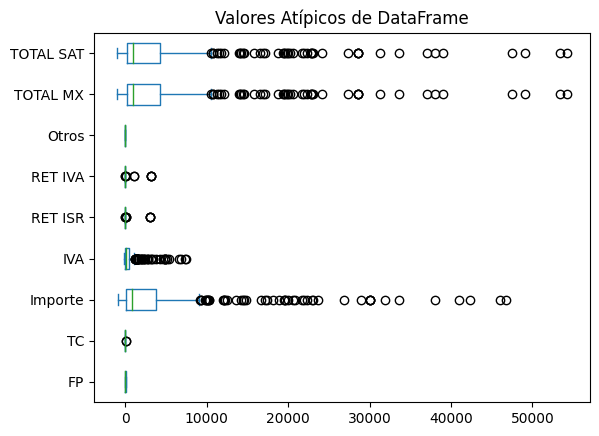

In [36]:
#REALIZAMOS DIAGRAMA DE CAJA O BIGOTE DE CADA COLUMNA DEL DATAFRAME
fig = plt.figure(figsize=(5,3))
cuantitativas_2023.plot(kind='box',vert=False)
plt.title('Valores Atípicos de DataFrame')
plt.show()

In [37]:
#METODO APLICANDO CUARTILES | ENCUENTRO CUARTILES 0.25 Y 0.75
y=cuantitativas_2023

percentile25_2023=y.quantile(0.25) #Q1
percentile75_2023=y.quantile(0.75) #Q3
iqr_2023=percentile75_2023 - percentile25_2023

Limite_Superior_iqr_2023 =percentile75_2023 + 1.5*iqr_2023
Limite_Inferior_iqr_2023 =percentile25_2023 - 1.5*iqr_2023

#ENCONTRAR OUTLIERS
outliers_iqr_2023 =cuantitativas_2023[(y>Limite_Superior_iqr_2023)|(y<Limite_Inferior_iqr_2023)]
outliers_iqr_2023.head()

#OBTENER DATOS LIMPIOS
año2023_iqr=cuantitativas_2023[(y<=Limite_Superior_iqr_2023)&(y>=Limite_Inferior_iqr_2023)]
año2023_iqr.head()

,FP,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,TOTAL SAT
0,99.0,1.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00
1,99.0,1.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00
2,99.0,1.0,5551.38,888.22,0.0,0.0,0.0,6439.60,6439.60
3,99.0,1.0,5551.98,888.32,0.0,0.0,0.0,6440.30,6440.30
4,99.0,1.0,8454.37,NaN,0.0,0.0,0.0,9807.07,9807.07


In [38]:
#IDENTIFICAR VALORES NULOS
valores_nulos_2023_1=año2023_iqr.isnull().sum()
valores_nulos_2023_1

FP            0
TC            2
Importe      50
IVA          49
RET ISR       9
RET IVA       9
Otros         0
TOTAL MX     46
TOTAL SAT    46
dtype: int64

In [39]:
#REMPLAZAMOS VALORES ATIPICOS (NULOS)DEL DATAFRAME CON MEAN
año2023_1_iqr=año2023_iqr.copy()
año2023_1_iqr=año2023_iqr.fillna(round(año2023_iqr.mean(),1))
año2023_1_iqr.head()

,FP,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,TOTAL SAT
0,99.0,1.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00
1,99.0,1.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00
2,99.0,1.0,5551.38,888.22,0.0,0.0,0.0,6439.60,6439.60
3,99.0,1.0,5551.98,888.32,0.0,0.0,0.0,6440.30,6440.30
4,99.0,1.0,8454.37,176.80,0.0,0.0,0.0,9807.07,9807.07


In [40]:
#JUNTAR
Datos_limpios_2023=pd.concat([cualititativas_2023,año2023_1_iqr],axis=1)
Datos_limpios_2023.head()

,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,Tipo,Status,Poliza,FP,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,TOTAL SAT
0,2023-01-01,31,49536321-60A4-523E-A32F-E8BDF5C2276E,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,PPD,P,Vigente,XX00-XXXXX,99.0,1.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00
1,2023-01-01,38,20FBB63B-D550-512F-9668-EEC6F983CEB7,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,PPD,P,Vigente,XX00-XXXXX,99.0,1.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00
2,2023-01-01,341932,DB8C4388-D4E0-4F0C-A09C-77C773257F44,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 30/36 de 03/12/...,PPD,I,Vigente,PE01-ENE23,99.0,1.0,5551.38,888.22,0.0,0.0,0.0,6439.60,6439.60
3,2023-01-01,341933,A81A63F5-D5EC-4601-803E-375AF9CC5021,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 30/36 de 03/12/...,PPD,I,Vigente,PE02-ENE23,99.0,1.0,5551.98,888.32,0.0,0.0,0.0,6440.30,6440.30
4,2023-01-01,342205,DCC10492-DE51-4C87-8430-5676FBF81931,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000009486 5/48 de 03/12/2...,PPD,I,Vigente,PE03-ENE23,99.0,1.0,8454.37,176.80,0.0,0.0,0.0,9807.07,9807.07


In [41]:
#CONVERTIR DATAFRAME A CSV
Datos_limpios_2023.to_csv("Datos_limpios_2023.csv")

#DESCARGAR ARCHIVOS FILTRADO A CSV
from google.colab import files

files.download("Datos_limpios_2023.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>